# Binomial Logistic Regression with Python · Airline CRM

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 24/09/2024

### Context

The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

### Data

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 

### Execution

Imported relevant Python packages.

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

Loaded the dataset.

In [3]:
df_original = pd.read_csv("Invistico_Airline.csv")

Output the first 10 rows of data.

In [4]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Checked the data type of each column, knowing that logistic regression models expect numeric data.

In [5]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

**Observation:** the `Inflight entertainment` variable, which is a focus for this project, is numeric but can be transformed into float type for the convenience of visualization, while the target column `satisfaction` needs to be labeled by binary values.

To assess the balance of classes, checked how many customers in the dataset are satisfied and how many are not.

In [49]:
classes_counts = df_original.satisfaction.value_counts()
classes_counts

satisfaction
1.0    71087
0.0    58793
Name: count, dtype: int64

Computed the baseline accuracy of the dataset for future comparison with the model performance metric.

In [52]:
classes_counts[1.0] / classes_counts.sum()

0.5473283030489683

**Observation:** There were 71,087 satisfied customers and 58,793 dissatisfied customers, the classes seem to be balanced enough. The baseline predictive accuracy of the dataset is 54.7%

Checked that there are no missing values in columns expected to be used in the model.

In [7]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Checked the assumption of no extreme outliers in the data.

In [18]:
Q1 = df_original['Inflight entertainment'].quantile(0.25)
Q3 = df_original['Inflight entertainment'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_original[(df_original['Inflight entertainment'] < lower_bound) 
            | (df_original['Inflight entertainment'] > upper_bound)]

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes


Made the `Inflight entertainment` column "of type float." 

In [8]:
df_original = df_original.astype({'Inflight entertainment': float})

Converted the categorical column `satisfaction` into numeric through one-hot encoding.

In [9]:
df_original['satisfaction'] = OneHotEncoder(drop = 'first').fit_transform(df_original[['satisfaction']]).toarray()

To examine what one-hot encoding did to the DataFrame, output the first 10 rows.

In [10]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Created the training and testing data with 70% for training and the remaining 30% for testing.

In [11]:
x = df_original[["Inflight entertainment"]]
y = df_original["satisfaction"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Built a logistic regression model and fitted the model to the training data.

In [12]:
model = LogisticRegression().fit(x_train, y_train)

Obtained parameter estimates.

In [14]:
model.coef_

array([[1.00724567]])

In [15]:
model.intercept_

array([-3.23515113])

Created a plot of the model to visualize results.

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

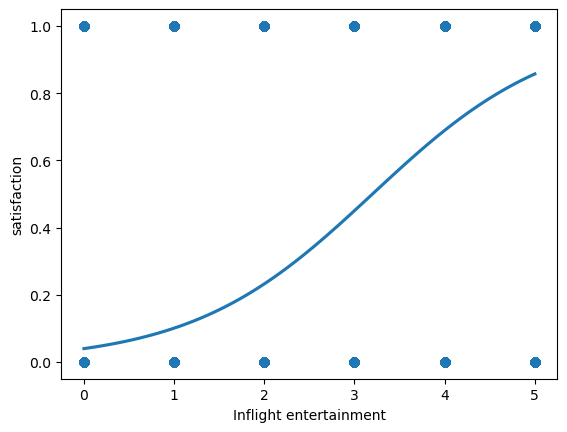

In [19]:
sns.regplot(x = 'Inflight entertainment', y = "satisfaction", data = df_original, logistic = True, ci = None)

**Observation:** The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, so that the general assumption of linearity is met.

Obtained and saved model predictions.

In [22]:
predictions = model.predict(x_test)
predictions

array([1., 0., 1., ..., 0., 0., 1.])

Obtained predictions as probabilities of classes.

In [23]:
proba_predictions = model.predict_proba(x_test)
proba_predictions

array([[0.31134655, 0.68865345],
       [0.90272759, 0.09727241],
       [0.14171998, 0.85828002],
       ...,
       [0.77217964, 0.22782036],
       [0.55315194, 0.44684806],
       [0.31134655, 0.68865345]])

Checked the assumption of linearity between the predictor and the logit of the model.

<Axes: xlabel='Inflight entertainment'>

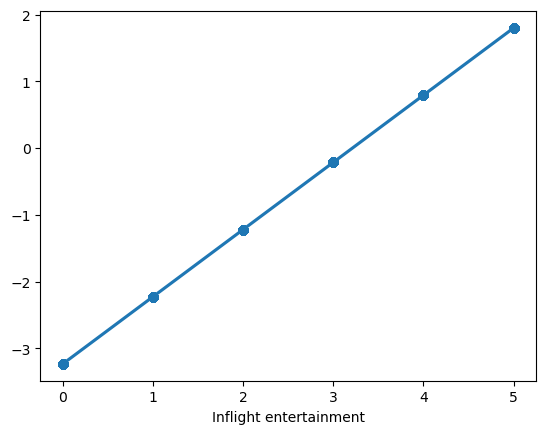

In [34]:
model_logit = np.log(proba_predictions[:, 1] / (1 - proba_predictions[:, 1]))
sns.regplot(x = 'Inflight entertainment', y = model_logit, data = x_test, ci = None)

Printed out the model's accuracy, precision, recall, and F1 score.

In [28]:
print('Accuracy: {:.6f}'.format(metrics.accuracy_score(y_test, predictions)))
print('Precision: {:.6f}'.format(metrics.precision_score(y_test, predictions)))
print('Recall: {:.6f}'.format(metrics.recall_score(y_test, predictions)))
print('F1 Score: {:.6f}'.format(metrics.f1_score(y_test, predictions)))

Accuracy: 0.801150
Precision: 0.818165
Recall: 0.820458
F1 Score: 0.819310


Produced a confusion matrix.

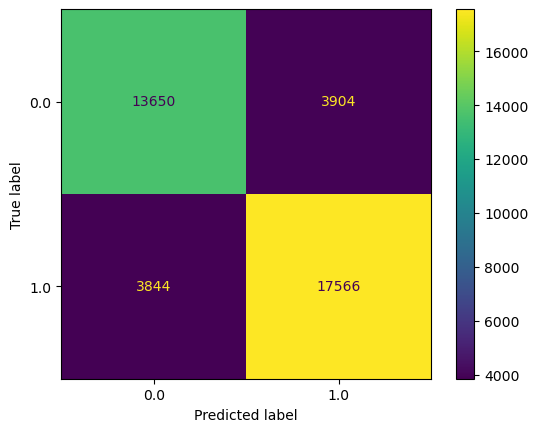

In [29]:
cm = metrics.confusion_matrix(y_test, predictions, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()

**Observation:** Two of the quadrants are under 4,000, which are relatively low numbers. These numbers relate to false positives and false negatives. Additionally, the other two quadrants — true positives and true negatives — are both high numbers above 13,000. Means that model produces much more of true predictions than false ones, which is good.

Displayed the ROC curve of the model's performance.

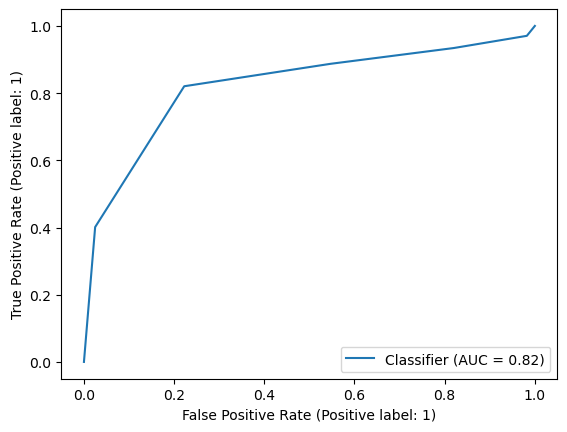

In [40]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, proba_predictions[:,1])
plt.show()

Displayed the AUC metric.

In [41]:
metrics.roc_auc_score(y_test, proba_predictions[:, 1])

0.8234646362725558

Calculated the exponent of the predictor's beta coefficient.

In [46]:
np.exp(model.coef_)

array([[2.73804914]])

**Сonclusions about the model quality:**

- Logistic Regression model accurately predicted satisfaction in 80.2% of cases. Having classes balanced enough, we can trust the accuracy metric.
- The confusion matrix displays a similar amount of true positives and true negatives, and the total amount of correct predictions is sufficiently larger than of incorrect. This highlights that the model does a good job of making predictions and is not prone to systematic errors.
- The model's accuracy of 80.2% is a clear improvement over the dataset's basic customer satisfaction rate of 54.7 percent.
- The AUC metric of 0.823 says that the model would correctly classify any random data with likelihood of 82.3%, which is far better than blind guessing.

**Insight on the main question of the project:** does a better in-flight entertainment experience lead to higher customer satisfaction?

- The OR (odds ratio) of predictor's beta coefficient at level of 2.73 shows us that every increase of «Inflight entertainment»'s feedback grade at 1 point increases the odds of customer being satisfied on 173%. So, improving in-flight entertainment should significantly raise customer satisfaction.

### Acknowledgment

I would like to express gratitude to Google and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Reference

This is a workplace scenario project proposed within the syllabus of Google Advanced Data Analytics Professional Certificate on Coursera.